In [19]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

clustering_data = pd.read_csv("data/clustering_data.csv")
clustering_pca = pd.read_csv("data/clustering_pca_data.csv")

#### most of the code here is doubled - we are comparing PCA approach and plain data

# flat clustering - k-means with 2 clusters

In [20]:
# initialize k-means
kmeans = KMeans(n_clusters = 2, n_init = 'auto', random_state=1337)
kmeans_pca = KMeans(n_clusters=2, n_init='auto', random_state=1337)
# fit
kmeans.fit(clustering_data)
kmeans_pca.fit(clustering_pca)

KMeans(n_clusters=2, n_init='auto', random_state=1337)

In [8]:
kmeans.predict(clustering_data)
kmeans.labels_

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,

### vizualize

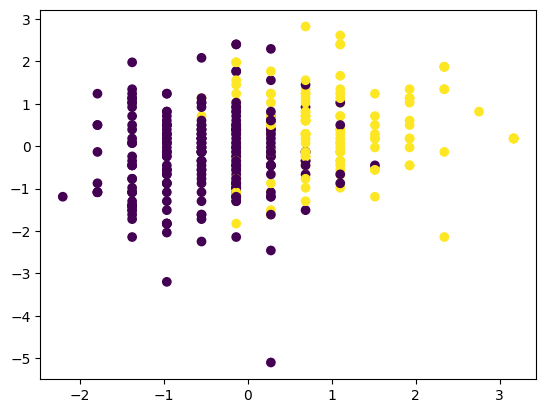

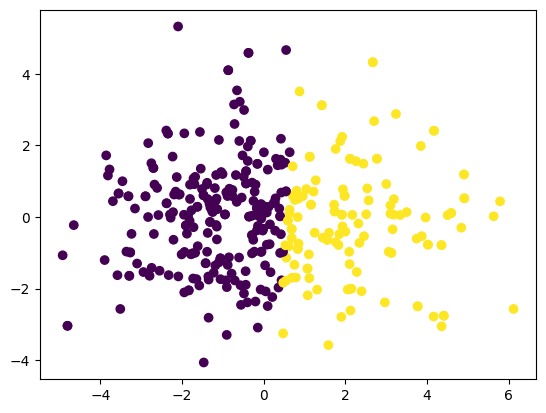

In [21]:
plt.scatter(x = clustering_data['weight(kg)'], y = clustering_data['hemoglobin'], c = kmeans.labels_, cmap = 'viridis')
plt.show()

plt.scatter(x = clustering_pca['pca1'],y =  clustering_pca['pca2'], c = kmeans_pca.labels_, cmap = 'viridis')
plt.show()

### elbow visualiser

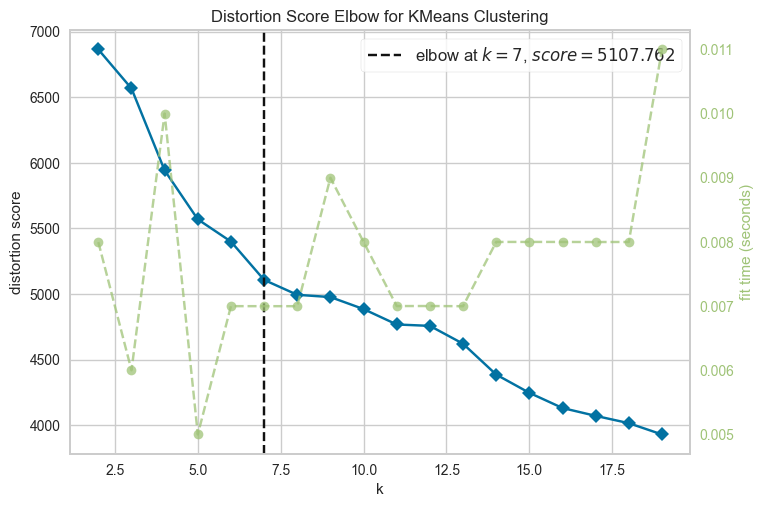

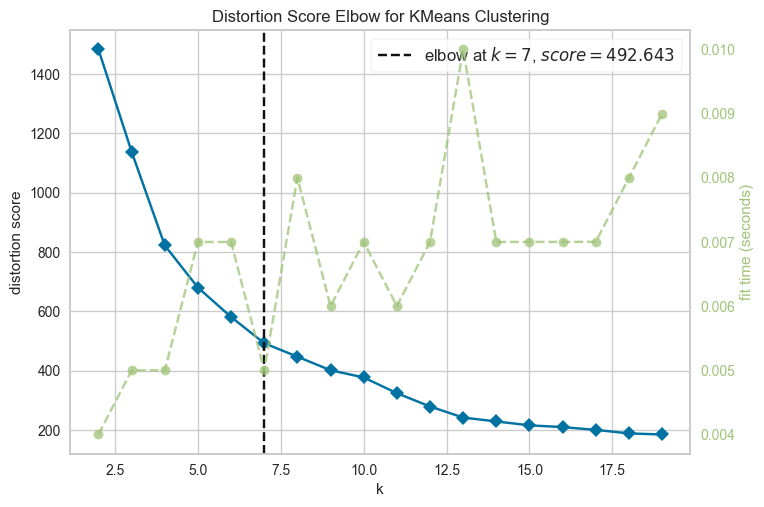

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
from yellowbrick.cluster import KElbowVisualizer

clusters = KMeans(max_iter = 500, n_init="auto", random_state=1337)
visual = KElbowVisualizer(clusters, k = (2, 20))
visual.fit(clustering_data)
visual.show()

clusters_pca = KMeans(max_iter = 500, n_init="auto", random_state=1337)
visual_pca = KElbowVisualizer(clusters_pca, k = (2, 20))
visual_pca.fit(clustering_pca)
visual_pca.show()

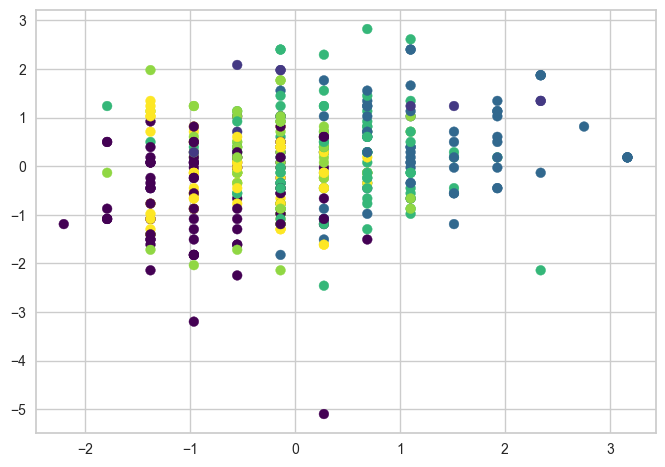

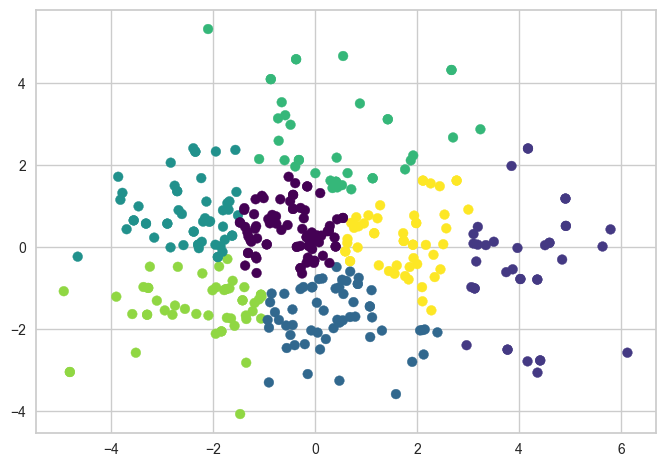

In [33]:
kmeans_optim = KMeans(n_clusters=7, n_init='auto', random_state=1337)
kmeans_pca_optim = KMeans(n_clusters=7, n_init='auto')


# fit
kmeans_optim.fit(clustering_data)
kmeans_pca_optim.fit(clustering_pca)

plt.scatter(x = clustering_data['weight(kg)'],y =  clustering_data['hemoglobin'], c = kmeans_optim.labels_, cmap = 'viridis')
# add centroids !!!!
plt.show()

plt.scatter(x = clustering_pca['pca1'],y =  clustering_pca['pca2'], c = kmeans_pca_optim.labels_, cmap = 'viridis')
# add centroids !!!!
plt.show()

# hierarchical clustering - trvá to fakt dlouho tbh

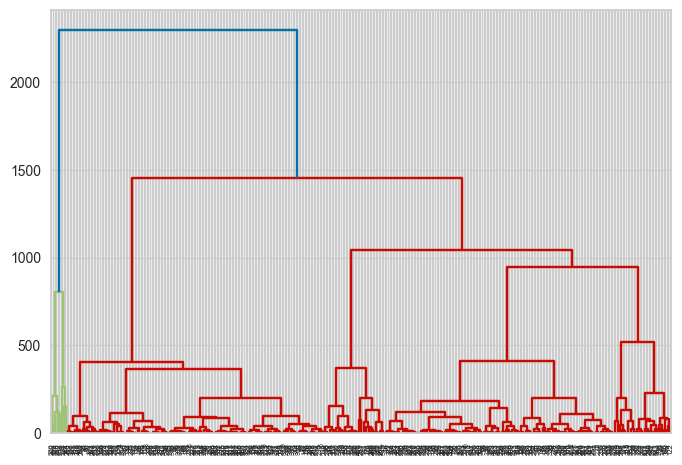

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(clustering_data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

### clustering

In [11]:
from sklearn.cluster import AgglomerativeClustering

#initialize clusters
clusters = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')

#assign data to clusters
predictions = clusters.fit_predict(clustering_data)
clustering_data['predictions'] = predictions
clustering_data


C:\Users\Kacka\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,pca1,pca2,predictions
0,-1.344923,-1.749165,2
1,0.385150,0.238137,0
2,-1.133579,0.217776,1
3,-2.007626,-1.046821,2
4,-0.594788,2.124993,4
...,...,...,...
366,-1.418710,-1.292505,2
367,1.587550,-3.580762,0
368,-0.013114,-0.329391,0
369,0.432734,0.683308,0


In [12]:
plt.scatter(x = clustering_data['weight(kg)'],y =  clustering_data['hemoglobin'], c = clustering_data['predictions'], cmap = 'viridis')
plt.show()

KeyError: 'weight(kg)'